## About

This page showcases the work of [Benjamin Nowak](https://x.com/BjnNowak) who originally [made the chart with R](https://r-graph-gallery.com/web-waffle-chart-share.html). This post is a translation to Python by [Joseph Barbier](https://barbierjoseph.com).
Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![small multiple waffle chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-waffle-chart-as-share.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- `pandas` is used to put the data into a dataframe
- `datetime` is used for dealing with the date format of our time variable

And that's it!


In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from pywaffle import Waffle
from highlight_text import fig_text, ax_text
from pyfonts import load_font, load_exact_font

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's](https://python-graph-gallery.com) Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

Next, we use the `melt()` function to switch **from one country per column** to a **single column with concatenated countries**, while keeping the values in the original `Time` variable.


In [2]:
path = 'https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/share-cereals.csv'
df = pd.read_csv(path)


def remove_html_tag(s):
    return s.split('</b>')[0][3:]


df['lab'] = df['lab'].apply(remove_html_tag)
df = df[df['type'] == 'feed']
df.reset_index(inplace=True)
df

,index,lab,type,percent
0,0,Africa,feed,21
1,2,Americas,feed,53
2,4,Asia,feed,32
3,6,Europe,feed,66
4,8,Oceania,feed,59


## Basic waffle chart

In order to create the following chart, we:

- determine how many charts to create based on the number of rows in the DataFrame

- set up a figure with multiple subplots, one for each row of data (5)

- for **each row** in the DataFrame:

  - It extracts the share.
  - It creates a waffle chart showing this share.

- each waffle chart uses a **4x25 grid** (100 squares total) to represent the percentage.


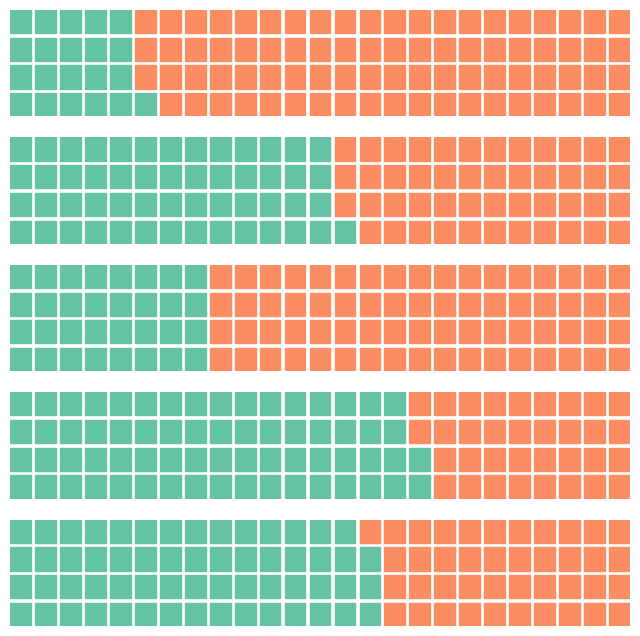

In [3]:
number_of_bars = len(df)  # one bar per continent

# Init the whole figure and axes
fig, axs = plt.subplots(
   nrows=number_of_bars,
   ncols=1,
   figsize=(8, 8)
)

# Iterate over each bar and create it
for (i, row), ax in zip(df.iterrows(), axs):

    share = row['percent']
    values = [share, 100-share]

    Waffle.make_waffle(
        ax=ax,
        rows=4,
        columns=25,
        values=values
    )

plt.show()

## Custom colors

The colors are changed thanks tot he `colors` argument in `Waffle.make_waffle()`, and the `set_facecolor()` for the background

_Note: the colors used are slightly different from the original colors._


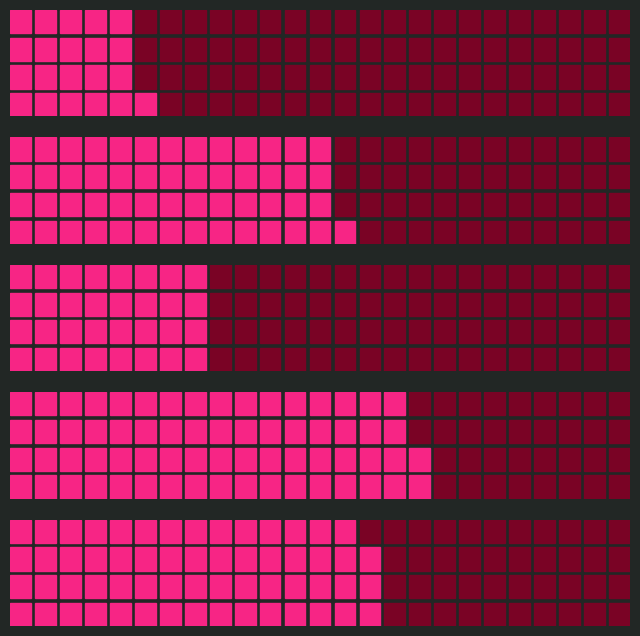

In [6]:
background_color = "#222725"
pink = "#f72585"
dark_pink = "#7a0325"

number_of_bars = len(df)  # one bar per continent

# Init the whole figure and axes
fig, axs = plt.subplots(
   nrows=number_of_bars,
   ncols=1,
   figsize=(8, 8)
)
fig.set_facecolor(background_color)


# Iterate over each bar and create it
for (i, row), ax in zip(df.iterrows(), axs):

    share = row['percent']
    values = [share, 100-share]

    Waffle.make_waffle(
        ax=ax,
        rows=4,
        columns=25,
        values=values,
        colors=[pink, dark_pink],
    )

plt.show()

## Title and credit

In order to add annotation, we need 2 new tools:

- `pyfonts` to load the fonts
- `highlight_text` to custom the text style

`highlight_text` provides the `fig_text()` and `ax_text()` functions (you can learn in [this post](/advanced-custom-annotations-matplotlib) that extensively describes how they work.)


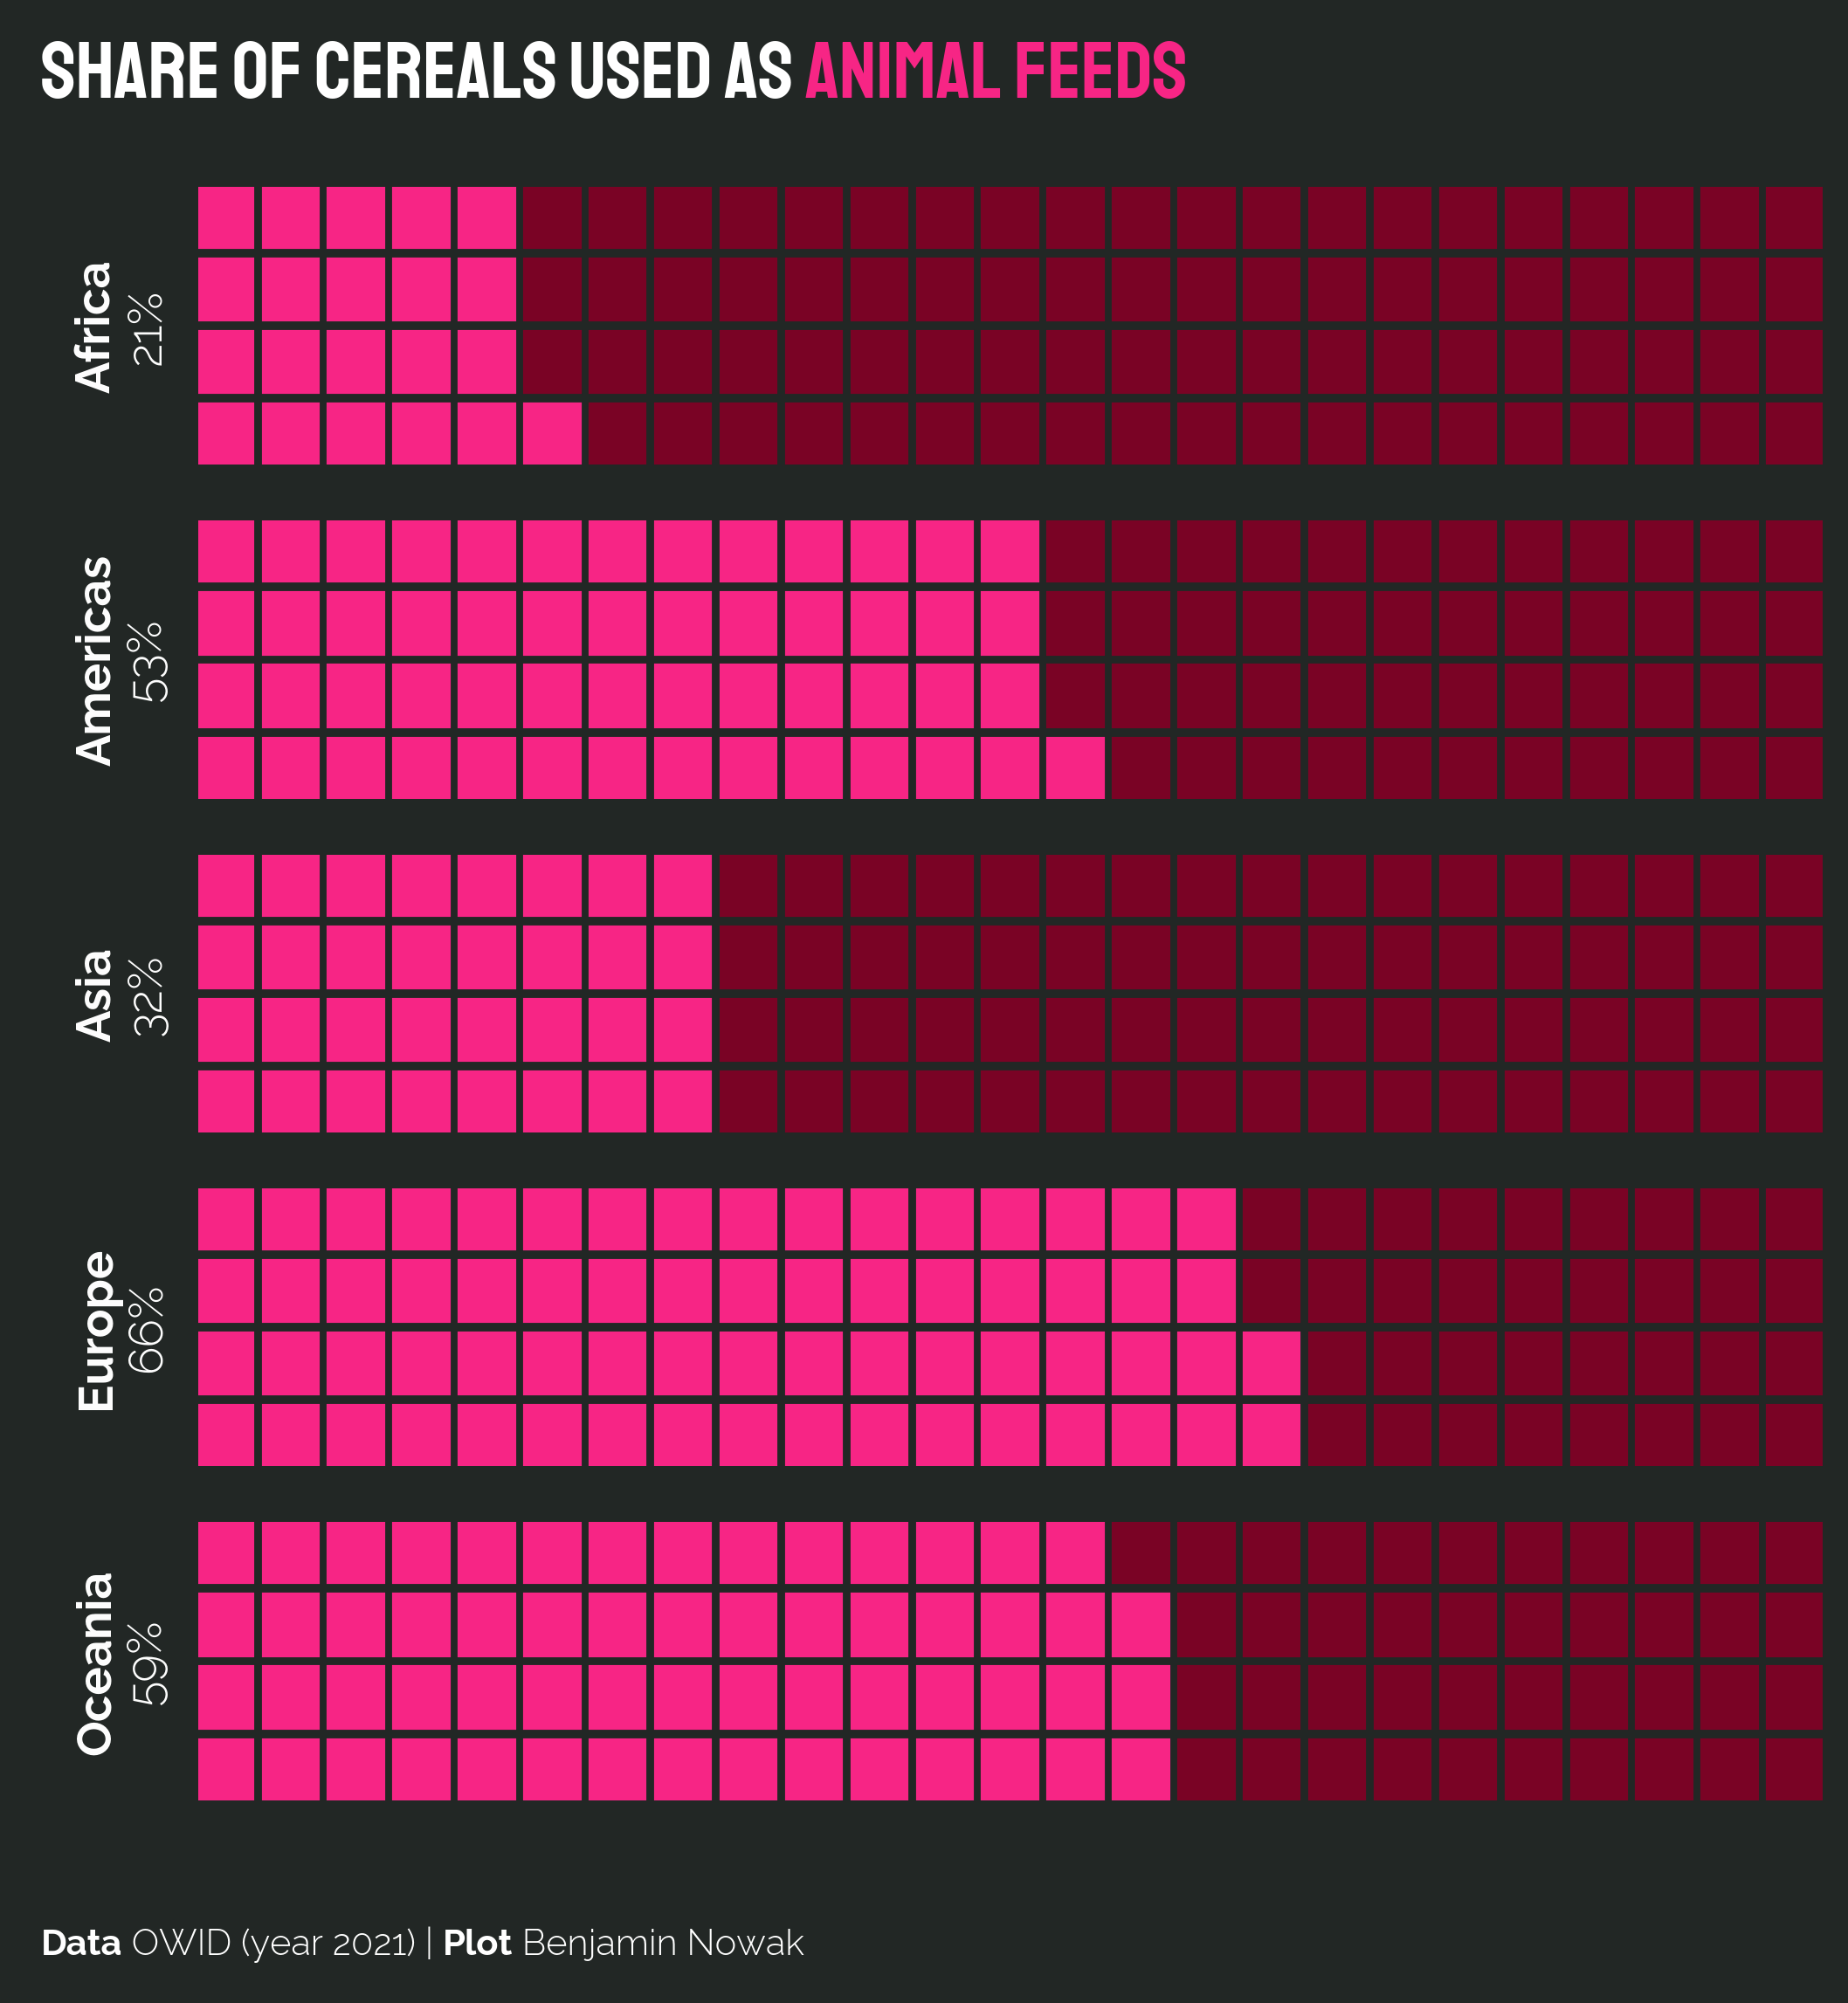

In [9]:
font_title = load_font("Staatliches")
font_credit = load_exact_font("https://github.com/impallari/Raleway/raw/master/fonts/v4020/Raleway-v4020-Light.otf")
bold_font_credit = load_exact_font("https://github.com/impallari/Raleway/raw/master/fonts/v4020/Raleway-v4020-Bold.otf")

background_color = "#222725"
pink = "#f72585"
dark_pink = "#7a0325"

number_of_bars = len(df)  # one bar per continent

# Init the whole figure and axes
fig, axs = plt.subplots(
   nrows=number_of_bars,
   ncols=1,
   figsize=(8, 8),
   dpi=300
)
fig.set_facecolor(background_color)
ax.set_facecolor('white')


# Iterate over each bar and create it
for (i, row), ax in zip(df.iterrows(), axs):

    share = row['percent']
    values = [share, 100-share]

    Waffle.make_waffle(
        ax=ax,
        rows=4,
        columns=25,
        values=values,
        colors=[pink, dark_pink],
    )

    text = f"{row['lab']}"
    ax.text(
        x=-0.4, y=0.5, s=text,
        font=bold_font_credit, color='white', rotation=90,
        ha='center', va='center', fontsize=13
    )
    text = f"{share}%"
    ax.text(
        x=-0.2, y=0.5, s=text,
        font=font_credit, color='white', rotation=90,
        ha='center', va='center', fontsize=13
    )

fig_text(
    x=0.05, y=0.95, s="SHARE OF CEREALS USED AS <ANIMAL FEEDS>",
    highlight_textprops=[{'color': pink}], color='white',
    fontsize=22, font=font_title
)
fig_text(
    x=0.05, y=0.05, s="<Data> OWID (year 2021) | <Plot> Benjamin Nowak",
    font=font_credit, color="white", fontsize=10,
    highlight_textprops=[{'font': bold_font_credit}]*2
)

plt.savefig('../../static/graph/web-waffle-chart-as-share.png', dpi=300)
plt.show()

## Going further

This article explains how to reproduce a [waffle chart](/waffle-chart) with custom colors and fonts.

You might be interested by:

- the [waffle chart section](/waffle-chart)
- how to [customize block style](/558-waffle-bar-chart)
- how to use waffle charts [to describe London boroughs](/web-waffle-with-small-multiples)
